In [1]:
!pip -q install -U transformers accelerate safetensors


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 94.9 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
import torch
import pandas as pd

from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
BASE_PATH = "/content/drive/MyDrive/My Work/Chaos/Code-mixed Chaos  Multi-labeled Banglish & Bangla/Code-mixed Chaos  Multi-labeled Banglish & Bangla"

MODEL_DIR = os.path.join(BASE_PATH, "trained_xlmr_model")  # folder you saved earlier

LABEL_COLS = [
    "Vulgar-based",
    "Religious-Hostility",
    "Troll-based",
    "Insult-based",
    "Loathe-based",
    "Threat-based",
    "Race-based",
    "Humilaton-Based",
    "Political-Chaos",
    "Non-Toxic"
]

print("MODEL_DIR:", MODEL_DIR)
print("Exists?", os.path.exists(MODEL_DIR))
if os.path.exists(MODEL_DIR):
    print("Some files:", os.listdir(MODEL_DIR)[:10])


MODEL_DIR: /content/drive/MyDrive/My Work/Chaos/Code-mixed Chaos  Multi-labeled Banglish & Bangla/Code-mixed Chaos  Multi-labeled Banglish & Bangla/trained_xlmr_model
Exists? True
Some files: ['config.json', 'model.safetensors', 'tokenizer_config.json', 'special_tokens_map.json', 'sentencepiece.bpe.model', 'tokenizer.json', 'training_args.bin']


In [ ]:
new_sexual_label_name = input("Please enter the new name for 'Sexual-based' label: ")

# Find the index of 'Sexual-based' and replace it
try:
    idx = LABEL_COLS.index("Sexual-based")
    LABEL_COLS[idx] = new_sexual_label_name
    print(f"Successfully changed 'Sexual-based' to '{new_sexual_label_name}' in LABEL_COLS.")
    print("Updated LABEL_COLS:", LABEL_COLS)
except ValueError:
    print("'Sexual-based' not found in LABEL_COLS. Please check the current label names.")

Please enter the new name for 'Sexual-based' label: Humaliation
'Sexual-based' not found in LABEL_COLS. Please check the current label names.


In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

print("Loaded on device:", device)


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

Loaded on device: cuda


In [ ]:
def predict_toxicity(texts, threshold=0.5, max_length=192):
    """
    texts: str or list[str]
    returns:
      probs: np array [N, num_labels]
      preds: np array [N, num_labels]
    """
    if isinstance(texts, str):
        texts = [texts]

    enc = tokenizer(
        texts,
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors="pt"
    )

    enc = {k: v.to(device) for k, v in enc.items()}

    with torch.no_grad():
        outputs = model(**enc)
        probs = torch.sigmoid(outputs.logits).cpu().numpy()

    preds = (probs >= threshold).astype(int)
    return probs, preds


In [ ]:
text = input("Enter text: ").strip()

probs, preds = predict_toxicity(text, threshold=0.5)

print("\n--- Results ---")
for i, label in enumerate(LABEL_COLS):
    print(f"{label:20s}  pred={preds[0][i]}  prob={probs[0][i]:.4f}")


Enter text: tomar gola jeno kemon

--- Results ---
Vulgar-based          pred=0  prob=0.0413
Religious-Hostility   pred=0  prob=0.0030
Troll-based           pred=0  prob=0.0083
Insult-based          pred=0  prob=0.0097
Loathe-based          pred=0  prob=0.0072
Threat-based          pred=0  prob=0.0061
Race-based            pred=0  prob=0.0027
Humilaton-Based       pred=0  prob=0.0483
Political-Chaos       pred=0  prob=0.0024
Non-Toxic             pred=1  prob=0.8747


In [ ]:
# The variables `labels_r` (true labels) and `y_pred_r` (predicted labels) are not defined.
# To generate confusion matrices, you need to first load a test dataset,
# and then make predictions on that dataset using the trained model.
# For example:
# true_labels = ... # Load your true labels (e.g., from a test CSV)
# test_texts = ... # Load your test texts

# # Example of how you might get predictions (assuming `predict_toxicity` is defined)
# all_probs, all_preds = predict_toxicity(test_texts)
# y_pred_r = all_preds # Or process as needed for one-hot encoding if your labels are one-hot
# labels_r = true_labels # Ensure this is in the same format as y_pred_r

print("Error: `labels_r` and `y_pred_r` are not defined. Please provide a test dataset and run predictions first.")


Error: `labels_r` and `y_pred_r` are not defined. Please provide a test dataset and run predictions first.


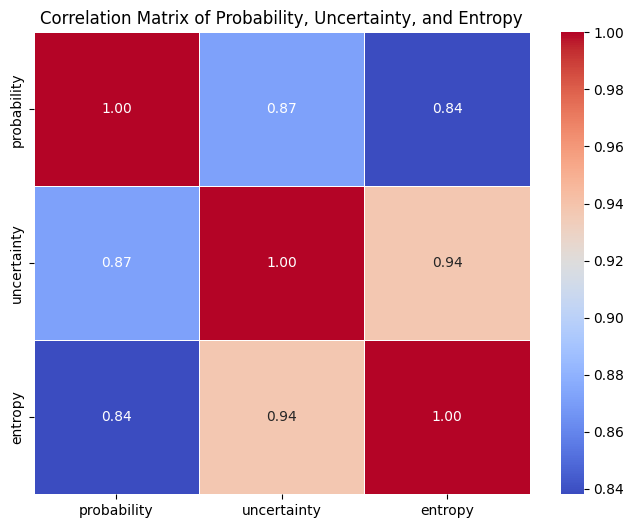

XAI

In [ ]:
!pip -q install captum


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 105.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tobler 0.13.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4

In [ ]:
import torch
import numpy as np
from captum.attr import LayerIntegratedGradients


In [ ]:
def forward_func(input_ids, attention_mask, target_label_idx: int):
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    # return logits for the target label only
    return outputs.logits[:, target_label_idx]


In [ ]:
def explain_text_lig(text, label_name, max_length=192, n_steps=50):
    assert label_name in LABEL_COLS, f"{label_name} not in LABEL_COLS"
    target_idx = LABEL_COLS.index(label_name)

    enc = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=max_length
    )

    input_ids = enc["input_ids"].to(device)               # LONG tensor ✅
    attention_mask = enc["attention_mask"].to(device)

    # baseline: PAD tokens (same shape, LONG tensor ✅)
    baseline_ids = torch.full_like(input_ids, tokenizer.pad_token_id).to(device)

    # XLM-R embedding layer
    emb_layer = model.roberta.embeddings.word_embeddings

    lig = LayerIntegratedGradients(forward_func, emb_layer)

    # attributions shape: [1, seq_len, emb_dim]
    attributions, delta = lig.attribute(
        inputs=input_ids,
        baselines=baseline_ids,
        additional_forward_args=(attention_mask, target_idx),
        n_steps=n_steps,
        return_convergence_delta=True
    )

    # sum attribution across embedding dimension -> per-token score
    token_attr = attributions.sum(dim=-1).squeeze(0)  # [seq_len]
    token_attr = token_attr.detach().cpu().numpy()

    token_ids = input_ids.squeeze(0).detach().cpu().tolist()
    tokens = tokenizer.convert_ids_to_tokens(token_ids)
    mask = attention_mask.squeeze(0).detach().cpu().numpy()

    # model probability for that label
    with torch.no_grad():
        out = model(input_ids=input_ids, attention_mask=attention_mask)
        prob = torch.sigmoid(out.logits)[0, target_idx].item()

    # keep only real tokens (mask==1) and ignore special tokens
    clean = []
    for tok, score, m in zip(tokens, token_attr, mask):
        if m == 1 and tok not in ["<s>", "</s>"]:
            clean.append((tok, float(score)))

    # normalize for display (optional)
    max_abs = max(1e-9, max(abs(s) for _, s in clean))
    clean = [(t, s / max_abs) for t, s in clean]

    return prob, clean, float(delta.item())


In [ ]:
text = "সমাজের এই বুকে সভ্য হওয়া জরুরী"
label_to_explain = "Non-Toxic"

prob, token_scores, delta = explain_text_lig(text, label_to_explain)

print("Text:", text)
print("Label:", label_to_explain)
print(f"Predicted probability: {prob:.4f}")
print(f"Convergence delta (smaller is better): {delta:.6f}")

token_scores_sorted = sorted(token_scores, key=lambda x: x[1], reverse=True)

print("\nTop positive tokens (push label ON):")
for t, s in token_scores_sorted[:10]:
    print(f"{t:15s} {s:+.3f}")

print("\nTop negative tokens (push label OFF):")
for t, s in sorted(token_scores, key=lambda x: x[1])[:10]:
    print(f"{t:15s} {s:+.3f}")


Text: সমাজের এই বুকে সভ্য হওয়া জরুরী
Label: Non-Toxic
Predicted probability: 0.9874
Convergence delta (smaller is better): 5.097120

Top positive tokens (push label ON):
▁সমাজ           +1.000
ও               +0.460
কে              +0.455
ের              +0.437
ী               +0.150
▁এই             +0.120
▁হ              +0.098
র               +0.052
▁বু             +0.011
্য              -0.043

Top negative tokens (push label OFF):
ভ               -0.328
<unk>           -0.191
▁জ              -0.150
▁স              -0.111
া               -0.058
ুর              -0.058
্য              -0.043
▁বু             +0.011
র               +0.052
▁হ              +0.098


In [ ]:
def highlight_tokens(token_scores, pos_th=0.3, neg_th=-0.3):
    out = []
    for tok, s in token_scores:
        if s >= pos_th:
            out.append(f"[+]{tok}")
        elif s <= neg_th:
            out.append(f"[-]{tok}")
        else:
            out.append(tok)
    return " ".join(out)

print(highlight_tokens(token_scores))


[+]▁সমাজ [+]ের ▁এই ▁বু [+]কে ▁স [-]ভ ্য ▁হ [+]ও <unk> া ▁জ র ুর ী


In [ ]:
from IPython.display import HTML, display
import html

def visualize_token_attributions(token_scores, title=None, max_tokens=256):
    """
    token_scores: list of (token, normalized_score) where score is ~[-1, 1]
    Red  => supports label (positive)
    Blue => opposes label (negative)
    """
    token_scores = token_scores[:max_tokens]

    parts = []
    if title:
        parts.append(f"<h3 style='font-family:Arial'>{html.escape(title)}</h3>")

    parts.append("<div style='font-family:monospace; line-height:2.3; font-size:18px;'>")

    for tok, score in token_scores:
        # XLM-R uses ▁ for word boundary
        display_tok = tok.replace("▁", " ")

        s = max(-1.0, min(1.0, float(score)))          # clamp
        alpha = min(0.85, max(0.10, abs(s)))           # intensity

        if s >= 0:
            bg = f"rgba(255, 0, 0, {alpha})"           # red
        else:
            bg = f"rgba(0, 0, 255, {alpha})"           # blue

        safe_tok = html.escape(display_tok)

        parts.append(
            f"<span title='{s:+.3f}' "
            f"style='background:{bg}; padding:2px 6px; margin:1px; border-radius:8px;'>"
            f"{safe_tok}</span>"
        )

    parts.append("</div>")

    parts.append("""
    <div style="margin-top:10px; font-family:Arial; font-size:14px;">
      <b>Legend:</b>
      <span style="background:rgba(255,0,0,0.45); padding:2px 8px; border-radius:8px;">Red</span> supports the label,
      <span style="background:rgba(0,0,255,0.45); padding:2px 8px; border-radius:8px;">Blue</span> opposes the label.
      (Hover tokens to see score)
    </div>
    """)

    display(HTML("".join(parts)))


In [ ]:
text = "এখানে কি করা যাবে"
label_to_explain = "Non-Toxic"

prob, token_scores, delta = explain_text_lig(text, label_to_explain)

print("Text:", text)
print("Label:", label_to_explain)
print(f"Predicted probability: {prob:.4f}")
print(f"Convergence delta: {delta:.6f}")

# ✅ Visual output
visualize_token_attributions(
    token_scores,
    title=f"XLM-R Layer IG — {label_to_explain} | prob={prob:.3f}"
)


Text: এখানে কি করা যাবে
Label: Non-Toxic
Predicted probability: 0.9700
Convergence delta: 1.338358


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors

def visualize_text_matplotlib(token_scores, title=None):
    fig, ax = plt.subplots(figsize=(14, 2))
    ax.axis("off")

    x = 0.01
    y = 0.5

    for tok, score in token_scores:
        tok = tok.replace("▁", " ")

        # Normalize score to color
        s = max(-1, min(1, score))
        if s >= 0:
            color = (1, 0, 0, abs(s))   # red
        else:
            color = (0, 0, 1, abs(s))   # blue

        ax.text(
            x, y, tok,
            fontsize=14,
            bbox=dict(facecolor=color, edgecolor="none", boxstyle="round,pad=0.3"),
            transform=ax.transAxes
        )

        x += 0.04 + len(tok) * 0.012
        if x > 0.95:
            x = 0.01
            y -= 0.4

    if title:
        ax.set_title(title)

    plt.show()


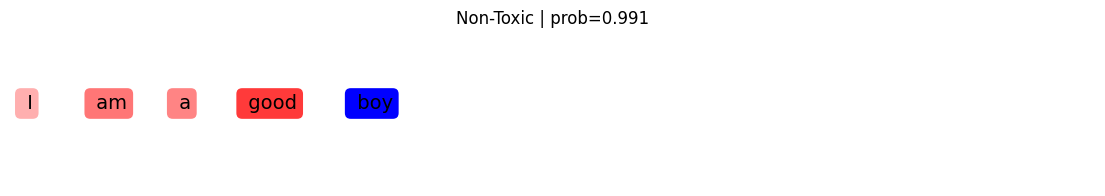

In [ ]:
visualize_text_matplotlib(
    token_scores,
    title=f"{label_to_explain} | prob={prob:.3f}"
)


LIME

In [ ]:
!pip -q install lime



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from lime.lime_text import LimeTextExplainer
import numpy as np


In [ ]:
def lime_predict_proba(texts):
    """
    texts: list of strings
    returns: numpy array [N, num_labels]
    """
    enc = tokenizer(
        texts,
        truncation=True,
        padding=True,
        max_length=192,
        return_tensors="pt"
    )

    enc = {k: v.to(device) for k, v in enc.items()}

    with torch.no_grad():
        outputs = model(**enc)
        probs = torch.sigmoid(outputs.logits).cpu().numpy()

    return probs


In [ ]:
explainer = LimeTextExplainer(
    class_names=LABEL_COLS,
    split_expression=r"\s+",  # whitespace split (works for Bangla & Banglish)
    bow=False
)


In [ ]:
text = "Ei post ta ekdom faltu, tumi seriously kono idea rakho na."
label_to_explain = "Insult-based"
label_idx = LABEL_COLS.index(label_to_explain)

exp = explainer.explain_instance(
    text_instance=text,
    classifier_fn=lime_predict_proba,
    labels=[label_idx],
    num_features=10,     # top words
    num_samples=2000     # more = more stable
)

print("Text:", text)
print("Explained label:", label_to_explain)


Text: Ei post ta ekdom faltu, tumi seriously kono idea rakho na.
Explained label: Insult-based


In [ ]:
exp.show_in_notebook(text=True)


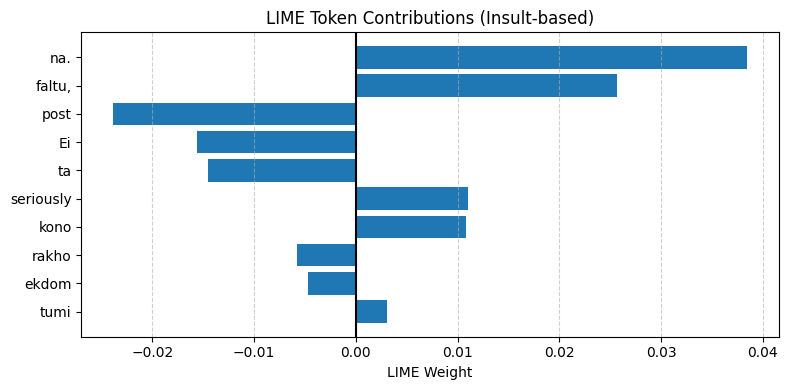

In [ ]:
import matplotlib.pyplot as plt

weights = exp.as_list(label=label_idx)

tokens = [w for w, _ in weights]
scores = [s for _, s in weights]

plt.figure(figsize=(8,4))
plt.barh(tokens, scores)
plt.axvline(0, color="black")
plt.xlabel("LIME Weight")
plt.title(f"LIME Token Contributions ({label_to_explain})")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
Uncertainty

NameError: name 'Uncertainty' is not defined

In [ ]:
def enable_dropout(model):
    for m in model.modules():
        if m.__class__.__name__.startswith("Dropout"):
            m.train()

In [ ]:
import numpy as np
import torch

def mc_dropout_predict(
    text,
    model,
    tokenizer,
    label_cols,
    n_samples=30,
    max_length=192
):
    enc = tokenizer(
        text,
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors="pt"
    )

    enc = {k: v.to(device) for k, v in enc.items()}

    enable_dropout(model)

    preds = []
    with torch.no_grad():
        for _ in range(n_samples):
            out = model(**enc)
            probs = torch.sigmoid(out.logits)
            preds.append(probs.cpu().numpy())

    preds = np.stack(preds)  # [T, 1, num_labels]

    mean_probs = preds.mean(axis=0)[0]
    std_probs = preds.std(axis=0)[0]   # ⭐ uncertainty

    return mean_probs, std_probs

In [ ]:
text = "tomar gola jeno kemon"

mean_probs, std_probs = mc_dropout_predict(
    text,
    model,
    tokenizer,
    LABEL_COLS,
    n_samples=40
)

for i, label in enumerate(LABEL_COLS):
    print(
        f"{label:20s} "
        f"mean={mean_probs[i]:.3f} "
        f"uncertainty={std_probs[i]:.3f}"
    )

Vulgar-based         mean=0.078 uncertainty=0.092
Religious-Hostility  mean=0.004 uncertainty=0.001
Troll-based          mean=0.014 uncertainty=0.011
Insult-based         mean=0.021 uncertainty=0.028
Loathe-based         mean=0.010 uncertainty=0.007
Threat-based         mean=0.009 uncertainty=0.006
Race-based           mean=0.005 uncertainty=0.004
Humilaton-Based      mean=0.091 uncertainty=0.094
Political-Chaos      mean=0.003 uncertainty=0.001
Non-Toxic            mean=0.772 uncertainty=0.228


Entropy

In [ ]:
def predictive_entropy(probs, eps=1e-8):
    return -(
        probs * np.log(probs + eps) +
        (1 - probs) * np.log(1 - probs + eps)
    )

In [ ]:
entropy = predictive_entropy(mean_probs)

for i, label in enumerate(LABEL_COLS):
    print(
        f"{label:20s} "
        f"prob={mean_probs[i]:.3f} "
        f"entropy={entropy[i]:.3f}"
    )

Vulgar-based         prob=0.078 entropy=0.273
Religious-Hostility  prob=0.004 entropy=0.026
Troll-based          prob=0.014 entropy=0.075
Insult-based         prob=0.021 entropy=0.101
Loathe-based         prob=0.010 entropy=0.058
Threat-based         prob=0.009 entropy=0.054
Race-based           prob=0.005 entropy=0.033
Humilaton-Based      prob=0.091 entropy=0.304
Political-Chaos      prob=0.003 entropy=0.023
Non-Toxic            prob=0.772 entropy=0.536


In [ ]:
print(f"The text for which the entropy was calculated is: '{text}'")

The text for which the entropy was calculated is: 'tomar gola jeno kemon'


In [ ]:
new_text = input("Enter a new text to calculate entropy for: ").strip()

mean_probs_new, std_probs_new = mc_dropout_predict(
    new_text,
    model,
    tokenizer,
    LABEL_COLS,
    n_samples=40
)

entropy_new = predictive_entropy(mean_probs_new)

print(f"\nPredictive Entropy for: '{new_text}'")
for i, label in enumerate(LABEL_COLS):
    print(
        f"{label:20s} "
        f"prob={mean_probs_new[i]:.3f} "
        f"entropy={entropy_new[i]:.3f}"
    )

# You can also visualize this new entropy data if you like, for example:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
# plt.barh(LABEL_COLS, entropy_new)
# plt.xlabel("Predictive Entropy")
# plt.title(f"Predictive Entropy per Label for '{new_text}'")
# plt.gca().invert_yaxis()
# plt.grid(axis="x", linestyle="--", alpha=0.6)
# plt.tight_layout()
# plt.show()

Enter a new text to calculate entropy for: Bujhis na je eita tor jonno dangerous hote pare?

Predictive Entropy for: 'Bujhis na je eita tor jonno dangerous hote pare?'
Vulgar-based         prob=0.033 entropy=0.146
Religious-Hostility  prob=0.033 entropy=0.145
Troll-based          prob=0.248 entropy=0.560
Insult-based         prob=0.162 entropy=0.442
Loathe-based         prob=0.059 entropy=0.225
Threat-based         prob=0.066 entropy=0.243
Race-based           prob=0.789 entropy=0.515
Humilaton-Based      prob=0.083 entropy=0.287
Political-Chaos      prob=0.026 entropy=0.121
Non-Toxic            prob=0.166 entropy=0.449


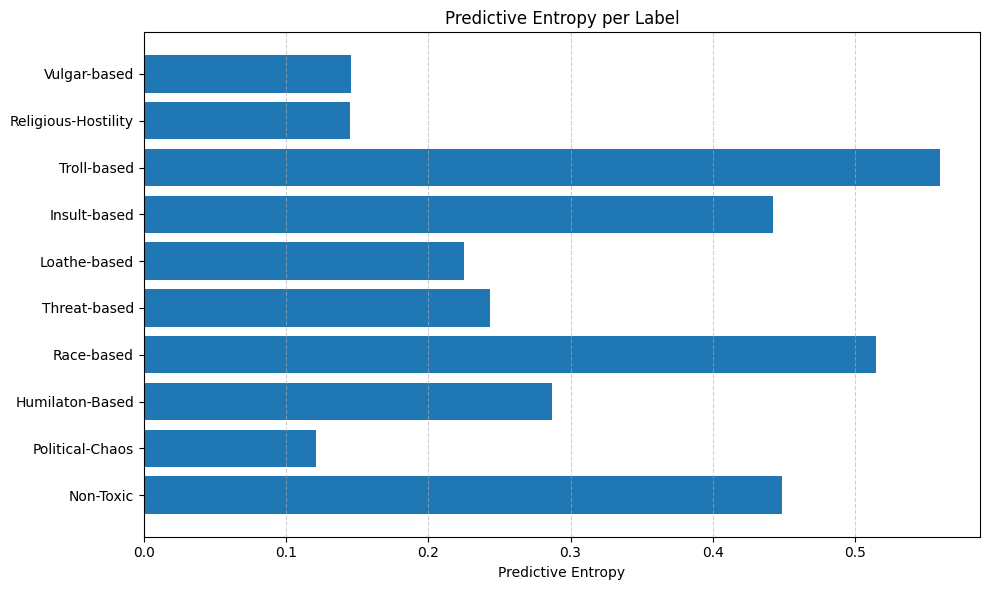

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(LABEL_COLS, entropy_new)
plt.xlabel("Predictive Entropy")
plt.title("Predictive Entropy per Label")
plt.gca().invert_yaxis() # Display high entropy at the top
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

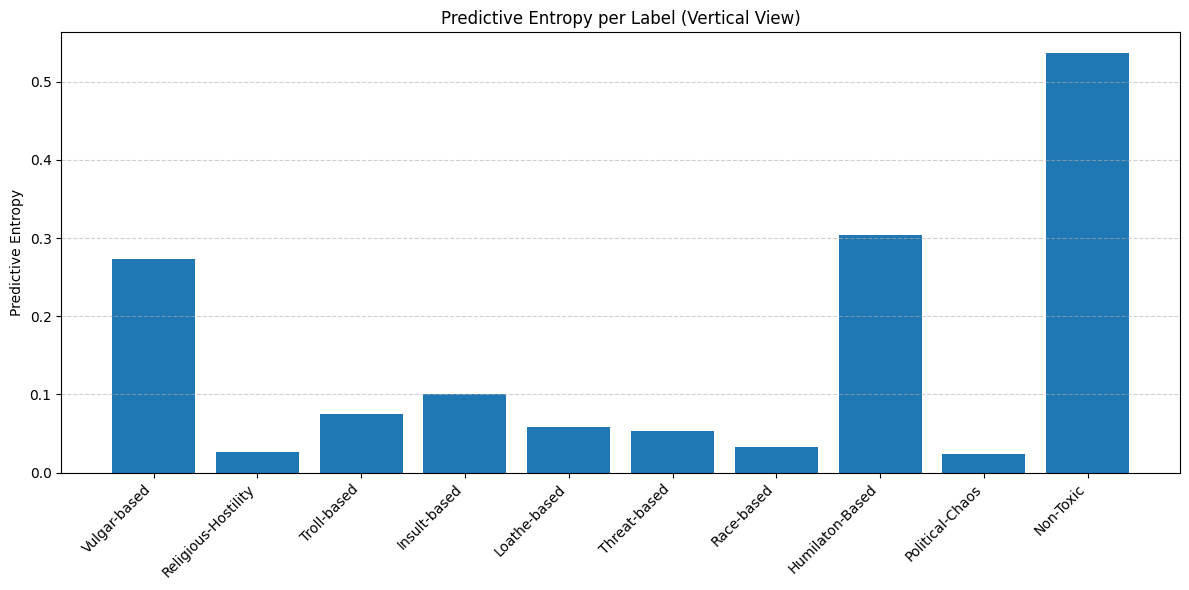

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(LABEL_COLS, entropy)
plt.ylabel("Predictive Entropy")
plt.title("Predictive Entropy per Label (Vertical View)")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
results = []

for i, label in enumerate(LABEL_COLS):
    results.append({
        "label": label,
        "probability": float(mean_probs_new[i]),
        "uncertainty": float(std_probs_new[i]),
        "entropy": float(entropy_new[i]),
        "toxic": mean_probs[i] >= 0.2
    })

results

[{'label': 'Vulgar-based',
  'probability': 0.03326834365725517,
  'uncertainty': 0.0126252556219697,
  'entropy': 0.14592581987380981,
  'toxic': np.False_},
 {'label': 'Religious-Hostility',
  'probability': 0.032989613711833954,
  'uncertainty': 0.01101785246282816,
  'entropy': 0.14498549699783325,
  'toxic': np.False_},
 {'label': 'Troll-based',
  'probability': 0.2477881908416748,
  'uncertainty': 0.06575571745634079,
  'entropy': 0.5598921775817871,
  'toxic': np.False_},
 {'label': 'Insult-based',
  'probability': 0.16171225905418396,
  'uncertainty': 0.051985468715429306,
  'entropy': 0.4424983263015747,
  'toxic': np.False_},
 {'label': 'Loathe-based',
  'probability': 0.0593540295958519,
  'uncertainty': 0.014523731544613838,
  'entropy': 0.22518634796142578,
  'toxic': np.False_},
 {'label': 'Threat-based',
  'probability': 0.06605331599712372,
  'uncertainty': 0.01963193714618683,
  'entropy': 0.24330833554267883,
  'toxic': np.False_},
 {'label': 'Race-based',
  'probabil

In [ ]:
import pandas as pd

df_results = pd.DataFrame(results)
df_results

,label,probability,uncertainty,entropy,toxic
0,Vulgar-based,0.033268,0.012625,0.145926,False
1,Religious-Hostility,0.032990,0.011018,0.144985,False
2,Troll-based,0.247788,0.065756,0.559892,False
3,Insult-based,0.161712,0.051985,0.442498,False
4,Loathe-based,0.059354,0.014524,0.225186,False
5,Threat-based,0.066053,0.019632,0.243308,False
6,Race-based,0.789410,0.149439,0.514738,False
7,Humilaton-Based,0.083303,0.031391,0.286764,False
8,Political-Chaos,0.026192,0.007473,0.121246,False
9,Non-Toxic,0.165614,0.127455,0.448864,True


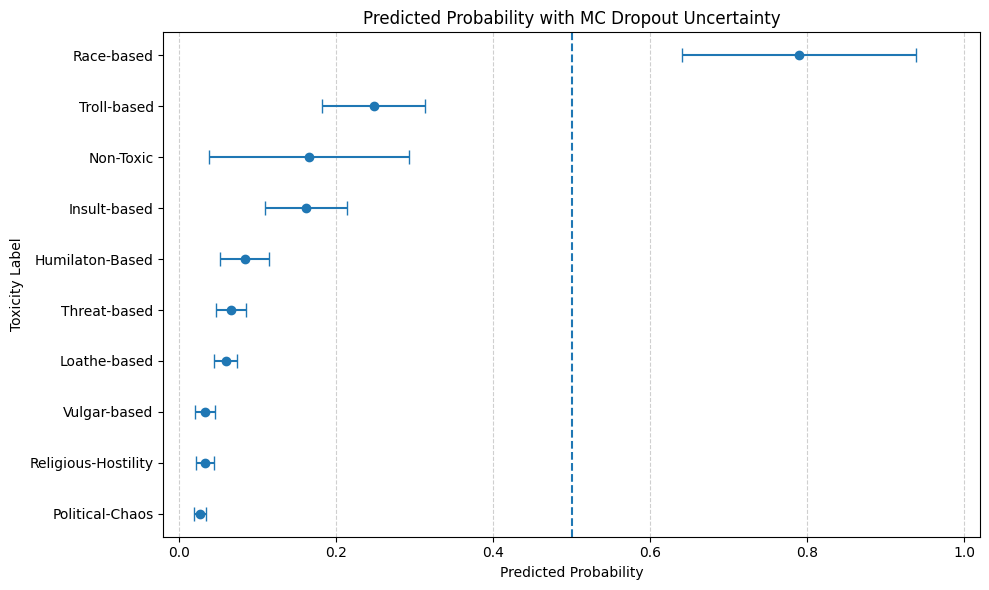

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dfp = df_results.copy()
dfp["toxic"] = dfp["probability"] >= 0.5
dfp = dfp.sort_values("probability", ascending=True)

y = np.arange(len(dfp))

plt.figure(figsize=(10, 6))
plt.errorbar(
    dfp["probability"],
    y,
    xerr=dfp["uncertainty"],   # std as uncertainty
    fmt="o",
    capsize=5
)

plt.yticks(y, dfp["label"])
plt.axvline(0.5, linestyle="--")  # threshold
plt.xlim(-0.02, 1.02)

plt.xlabel("Predicted Probability")
plt.ylabel("Toxicity Label")
plt.title("Predicted Probability with MC Dropout Uncertainty")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


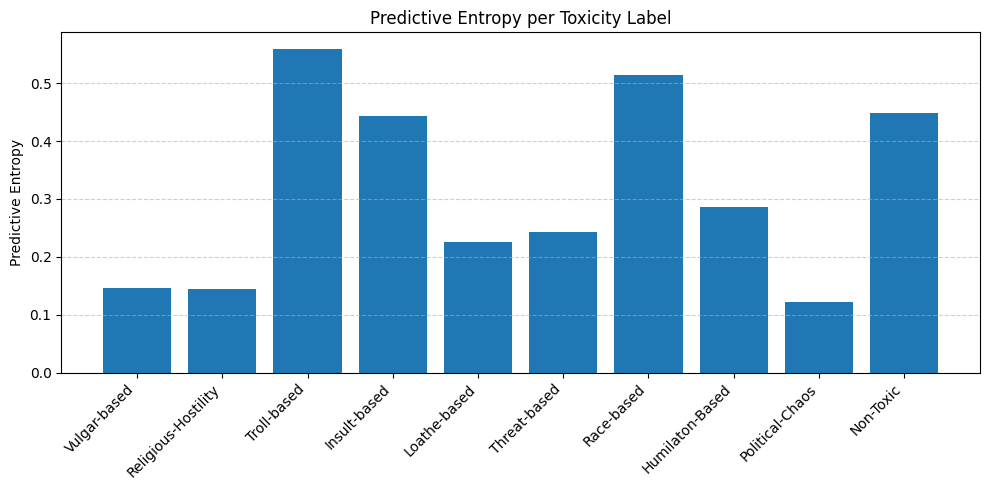

In [ ]:
plt.figure(figsize=(10, 5))

plt.bar(
    df_results["label"],
    df_results["entropy"]
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Predictive Entropy")
plt.title("Predictive Entropy per Toxicity Label")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

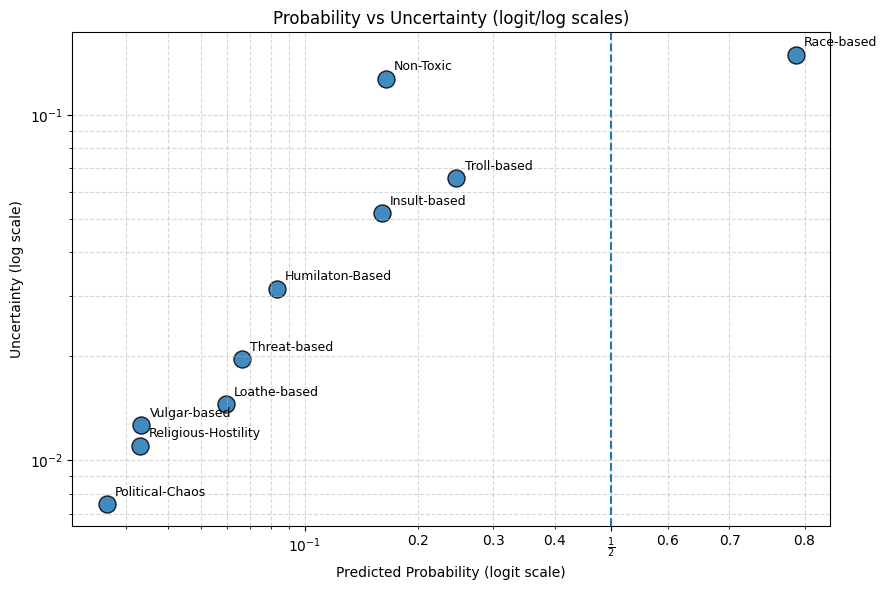

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

eps = 1e-6
x = np.clip(df_results["probability"].values, eps, 1 - eps)
y = df_results["uncertainty"].values
labels = df_results["label"].values

plt.figure(figsize=(9, 6))
plt.scatter(x, y, s=150, alpha=0.85, edgecolors="black")

for xi, yi, lab in zip(x, y, labels):
    plt.annotate(lab, (xi, yi), xytext=(6, 6), textcoords="offset points", fontsize=9)

plt.xscale("logit")            # ✅ spreads values near 0 and 1
plt.yscale("log")

plt.axvline(0.5, linestyle="--")
plt.xlabel("Predicted Probability (logit scale)")
plt.ylabel("Uncertainty (log scale)")
plt.title("Probability vs Uncertainty (logit/log scales)")
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


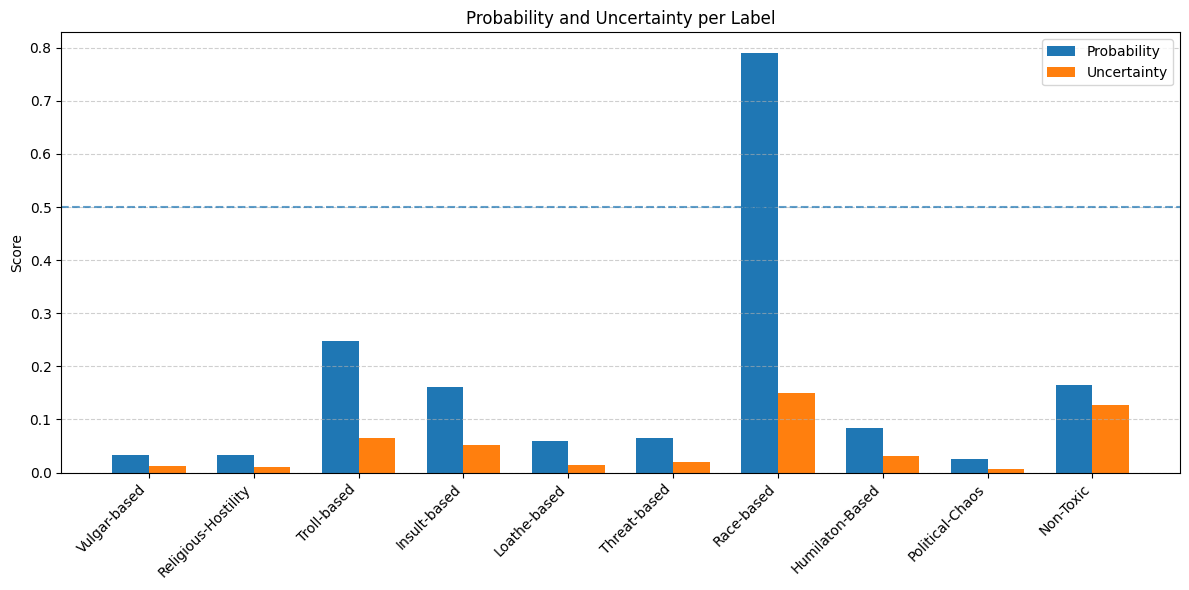

In [ ]:
import numpy as np

x = np.arange(len(df_results))
width = 0.35

plt.figure(figsize=(12, 6))

plt.bar(x - width/2, df_results["probability"], width, label="Probability")
plt.bar(x + width/2, df_results["uncertainty"], width, label="Uncertainty")

plt.axhline(0.5, linestyle="--", alpha=0.7)

plt.xticks(x, df_results["label"], rotation=45, ha="right")
plt.ylabel("Score")
plt.title("Probability and Uncertainty per Label")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
BASE_PATH = "/content/drive/MyDrive/My Work/Chaos/Code-mixed Chaos  Multi-labeled Banglish & Bangla/Code-mixed Chaos  Multi-labeled Banglish & Bangla"

bangla_path   = f"{BASE_PATH}/Bangla.xlsx"
banglish_path = f"{BASE_PATH}/Banglish.xlsx"

In [ ]:
import pandas as pd

df_bangla   = pd.read_excel(bangla_path)
df_banglish = pd.read_excel(banglish_path)

print("Bangla shape:", df_bangla.shape)
print("Banglish shape:", df_banglish.shape)

df_bangla.head()


Bangla shape: (10234, 11)
Banglish shape: (10234, 11)


,Text,Vulgar-based,Religious-Hostility,Troll-based,Insult-based,Loathe-based,Threat-based,Race-based,Sexual-based,Political-Chaos,Non-Toxic
0,ইউসুফ সরকারকে এর চরম মূল্য দিতে হবে🤪,0,0,1,0,0,0,0,0,1,0
1,"হাসিনা ইজ লাইক আওয়ার বাঙ্গালী বয়ফ্রেইন্ড, মানু...",0,0,1,1,0,0,0,0,1,0
2,হাসিনা সরকার প্রমান করে যে মেয়েরা কখনো তাদের দ...,0,0,1,0,0,0,0,0,1,0
3,আপু তোমার কি হ্যান্ড এমব্রয়ডারি ফ্রি সিরিজ ইউট...,0,0,0,0,0,0,0,0,0,1
4,"ভাই এর লজিক টাইটানিক এর লাইফ জ্যাকেট এর মতো, দ...",0,0,1,1,0,0,0,0,0,0


In [ ]:
df_bangla["source"] = "bangla"
df_banglish["source"] = "banglish"

df = pd.concat([df_bangla, df_banglish], ignore_index=True)

print("Combined shape:", df.shape)


Combined shape: (20468, 12)


In [ ]:
TEXT_COL = "Text"

LABEL_COLS = [
    "Vulgar-based",
    "Religious-Hostility",
    "Troll-based",
    "Insult-based",
    "Loathe-based",
    "Threat-based",
    "Race-based",
    "Humilation-Based",
    "Political-Chaos",
    "Non-Toxic"
]


In [ ]:
df[TEXT_COL] = df[TEXT_COL].astype(str).fillna("").str.strip()
df = df[df[TEXT_COL].str.len() > 0].reset_index(drop=True)

# Rename the 'Sexual-based' column to 'Humilation-Based' to match LABEL_COLS
if 'Sexual-based' in df.columns and 'Humilation-Based' in LABEL_COLS:
    df = df.rename(columns={'Sexual-based': 'Humilation-Based'})

for c in LABEL_COLS:
    df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0).astype(int)
    df[c] = df[c].clip(0, 1)

df[LABEL_COLS].sum()

,0
Vulgar-based,3148
Religious-Hostility,1452
Troll-based,2000
Insult-based,3596
Loathe-based,2816
Threat-based,2030
Race-based,1232
Humilation-Based,3076
Political-Chaos,1900
Non-Toxic,10234


In [ ]:
from sklearn.model_selection import train_test_split

X = df[TEXT_COL].tolist()
y = df[LABEL_COLS].values

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=42, shuffle=True
)


In [ ]:
import numpy as np
import torch

def predict_toxicity_batched(texts, model, tokenizer, threshold=0.5, batch_size=16, max_length=192):
    model.eval()
    all_probs = []
    all_preds = []

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]

        enc = tokenizer(
            batch_texts,
            truncation=True,
            padding=True,
            max_length=max_length,
            return_tensors="pt"
        )

        enc = {k: v.to(device) for k, v in enc.items()}

        with torch.no_grad():
            out = model(**enc)
            probs = torch.sigmoid(out.logits).cpu().numpy()

        preds = (probs >= threshold).astype(int)

        all_probs.append(probs)
        all_preds.append(preds)

        # free GPU memory
        del enc, out
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

    all_probs = np.vstack(all_probs)
    all_preds = np.vstack(all_preds)
    return all_probs, all_preds


In [ ]:
labels_r = y_val  # true labels
_, y_pred_r = predict_toxicity_batched(
    X_val,
    model,          # Use 'model' instead of 'model_roberta'
    tokenizer,
    threshold=0.5,
    batch_size=8,           # reduce if still heavy
    max_length=192
)

print("Pred shape:", y_pred_r.shape)

Pred shape: (3071, 10)


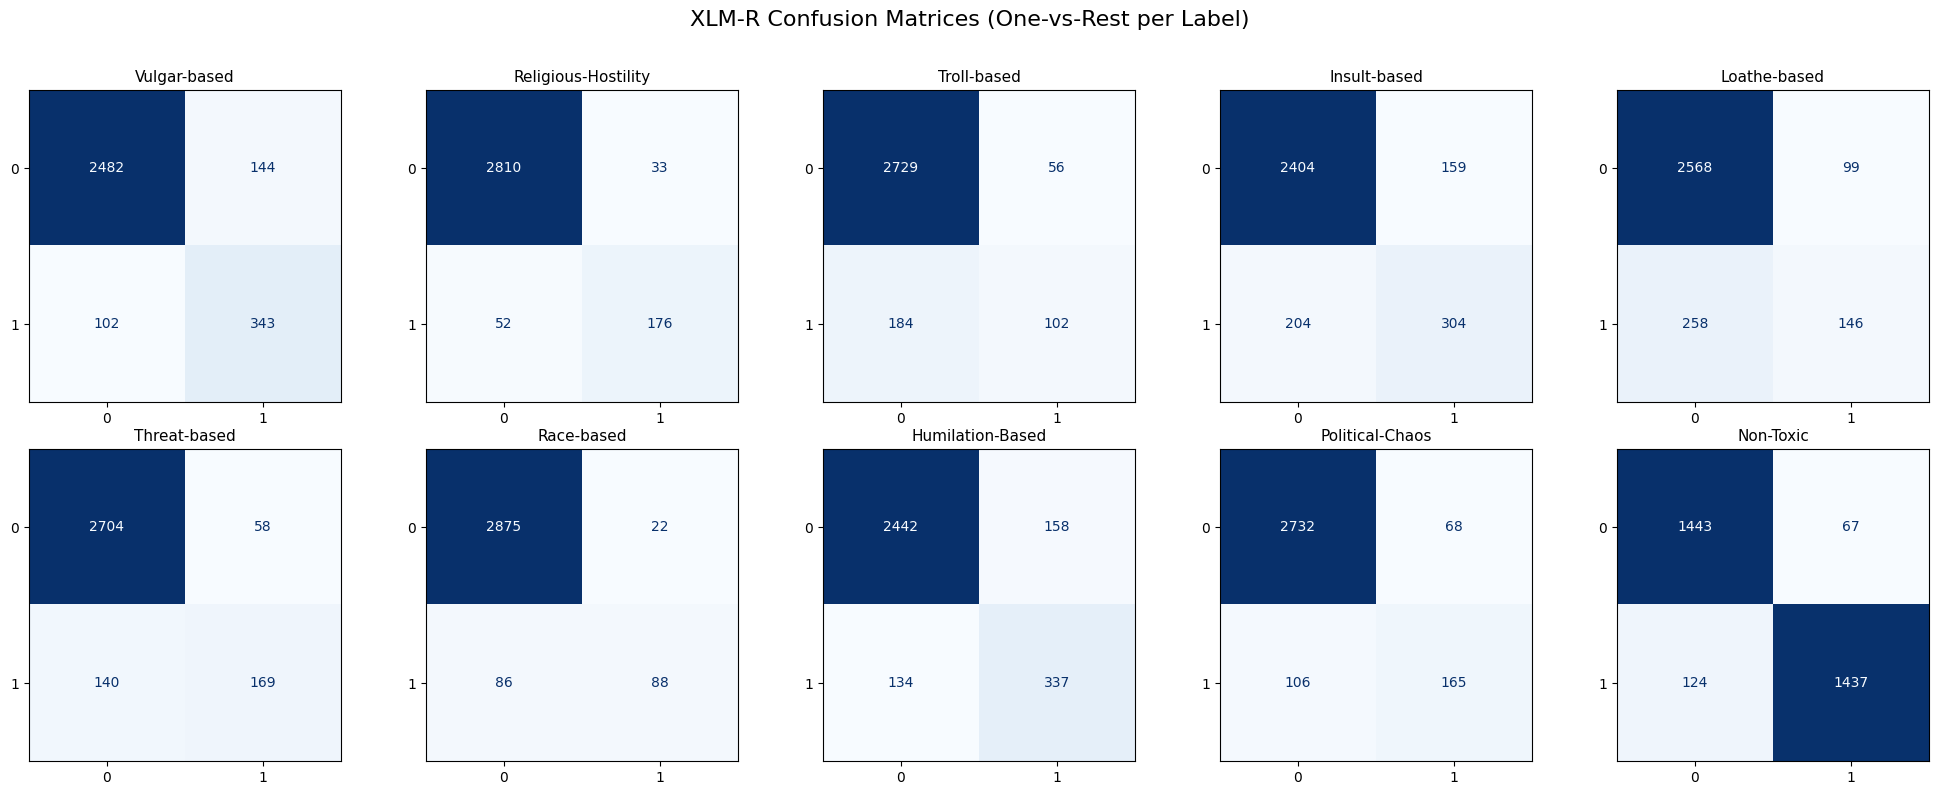

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

num_labels = len(LABEL_COLS)
cols = 5
rows = int(np.ceil(num_labels / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
axes = axes.flatten()

for i, label in enumerate(LABEL_COLS):
    cm = confusion_matrix(labels_r[:, i], y_pred_r[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1"])
    disp.plot(ax=axes[i], values_format="d", cmap="Blues", colorbar=False)
    axes[i].set_title(label, fontsize=11)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].grid(False)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("XLM-R Confusion Matrices (One-vs-Rest per Label)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

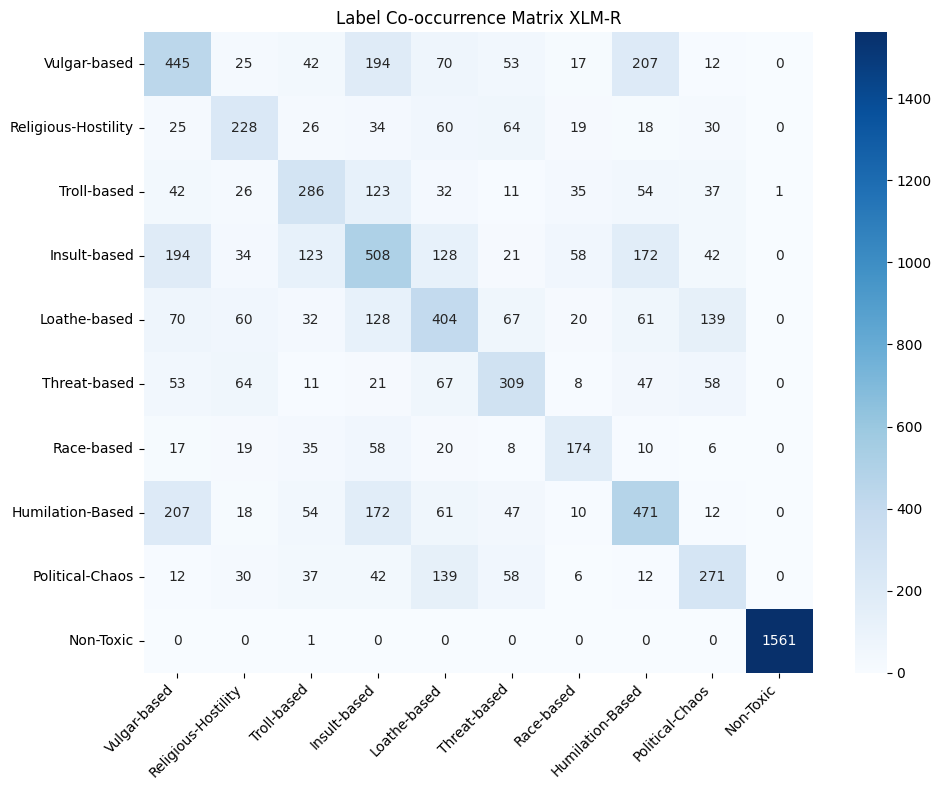

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the label co-occurrence matrix
co_occurrence_r = np.dot(labels_r.T, labels_r)

plt.figure(figsize=(10,8))
sns.heatmap(
    co_occurrence_r,
    xticklabels=LABEL_COLS,
    yticklabels=LABEL_COLS,
    cmap="Blues",
    annot=True,
    fmt=".0f"
)
plt.title("Label Co-occurrence Matrix XLM-R")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns for correlation
correlation_data = df_results[['probability', 'uncertainty', 'entropy']]

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Probability, Uncertainty, and Entropy')
plt.show()